# OASIS INFOBYTE DATASCIENCE INTERNSHIP

# ARPITA SAHOO

## TASK 3

### CAR PRICE PREDICTION WITH MACHINE LEARNING

In [1]:
import pandas as pd
df=pd.read_csv('CarPrice.csv')
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [2]:
df.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [3]:
df.dtypes

car_ID                int64
symboling             int64
CarName              object
fueltype             object
aspiration           object
doornumber           object
carbody              object
drivewheel           object
enginelocation       object
wheelbase           float64
carlength           float64
carwidth            float64
carheight           float64
curbweight            int64
enginetype           object
cylindernumber       object
enginesize            int64
fuelsystem           object
boreratio           float64
stroke              float64
compressionratio    float64
horsepower            int64
peakrpm               int64
citympg               int64
highwaympg            int64
price               float64
dtype: object

In [4]:
df['carbody'].value_counts()

carbody
sedan          96
hatchback      70
wagon          25
hardtop         8
convertible     6
Name: count, dtype: int64

In [5]:
df['drivewheel'].value_counts()

drivewheel
fwd    120
rwd     76
4wd      9
Name: count, dtype: int64

In [6]:
for i in df.columns:
    if(df[i].dtype=='object'):
        print(i)
        print(df[i].value_counts())
        print("\n")

CarName
CarName
toyota corona           6
toyota corolla          6
peugeot 504             6
subaru dl               4
mitsubishi mirage g4    3
                       ..
mazda glc 4             1
mazda rx2 coupe         1
maxda glc deluxe        1
maxda rx3               1
volvo 246               1
Name: count, Length: 147, dtype: int64


fueltype
fueltype
gas       185
diesel     20
Name: count, dtype: int64


aspiration
aspiration
std      168
turbo     37
Name: count, dtype: int64


doornumber
doornumber
four    115
two      90
Name: count, dtype: int64


carbody
carbody
sedan          96
hatchback      70
wagon          25
hardtop         8
convertible     6
Name: count, dtype: int64


drivewheel
drivewheel
fwd    120
rwd     76
4wd      9
Name: count, dtype: int64


enginelocation
enginelocation
front    202
rear       3
Name: count, dtype: int64


enginetype
enginetype
ohc      148
ohcf      15
ohcv      13
dohc      12
l         12
rotor      4
dohcv      1
Name: count, dtype:

In [7]:
df = df.drop(['CarName', 'car_ID','enginelocation'], axis=1)

In [8]:
from sklearn.preprocessing import LabelEncoder as LE 
df.isnull().sum()

symboling           0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [9]:
cols = ['fueltype','aspiration','doornumber', 'carbody','enginetype','drivewheel','cylindernumber','wheelbase','fuelsystem']
for i in cols:
    df[f"{i}_le"]=LE().fit_transform(df[i])
    df=df.drop(i,axis=1)
df.head()

,symboling,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,...,price,fueltype_le,aspiration_le,doornumber_le,carbody_le,enginetype_le,drivewheel_le,cylindernumber_le,wheelbase_le,fuelsystem_le
0,3,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,...,13495.0,1,0,1,0,0,2,2,2,5
1,3,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,...,16500.0,1,0,1,0,0,2,2,2,5
2,1,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,...,16500.0,1,0,1,2,5,2,3,10,5
3,2,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,...,13950.0,1,0,0,3,3,1,2,30,5
4,2,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,...,17450.0,1,0,0,3,3,0,1,28,5


In [10]:
from sklearn.preprocessing import MinMaxScaler as mms 
import pandas as pd
# cols =df.columns
# df=mms().fit_transform(df)
# for i in cols:
#     df[f"{i}_mms"] = mms().fit_transform(df[i])
#     df = df.drop(i, axis=1)
# df.head()


scaler = mms(feature_range=(-1, 1))

# Apply the scaler to all columns in the DataFrame
df1= pd.DataFrame(scaler.fit_transform(df), columns=df.columns)
df1


,symboling,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,...,price,fueltype_le,aspiration_le,doornumber_le,carbody_le,enginetype_le,drivewheel_le,cylindernumber_le,wheelbase_le,fuelsystem_le
0,1.0,-0.173134,-0.366667,-0.833333,-0.177657,-0.479245,0.328571,-0.419048,-0.7500,-0.475000,...,-0.584082,1.0,-1.0,1.0,-1.0,-1.000000,1.0,-0.333333,-0.923077,0.428571
1,1.0,-0.173134,-0.366667,-0.833333,-0.177657,-0.479245,0.328571,-0.419048,-0.7500,-0.475000,...,-0.434884,1.0,-1.0,1.0,-1.0,-1.000000,1.0,-0.333333,-0.923077,0.428571
2,0.2,-0.101493,-0.133333,-0.233333,0.035687,-0.313208,-0.800000,0.333333,-0.7500,-0.116667,...,-0.434884,1.0,-1.0,1.0,0.0,0.666667,1.0,0.000000,-0.615385,0.428571
3,0.6,0.059701,-0.016667,0.083333,-0.341350,-0.637736,-0.071429,0.266667,-0.6250,-0.550000,...,-0.561491,1.0,-1.0,-1.0,0.5,0.000000,0.0,-0.333333,0.153846,0.428571
4,0.6,0.059701,0.016667,0.083333,0.036462,-0.433962,-0.071429,0.266667,-0.8750,-0.441667,...,-0.387717,1.0,-1.0,-1.0,0.5,0.000000,-1.0,-0.666667,0.076923,0.428571
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-0.6,0.423881,0.433333,0.283333,0.135764,-0.396226,0.771429,0.028571,-0.6875,-0.450000,...,-0.417755,1.0,-1.0,-1.0,0.5,0.000000,1.0,-0.333333,0.769231,0.428571
201,-0.6,0.423881,0.416667,0.283333,0.211016,-0.396226,0.771429,0.028571,-0.7875,-0.066667,...,-0.308525,1.0,1.0,-1.0,0.5,0.000000,1.0,-0.333333,0.769231,0.428571
202,-0.6,0.423881,0.433333,0.283333,0.182312,-0.154717,0.485714,-0.238095,-0.7750,-0.283333,...,-0.187379,1.0,-1.0,-1.0,0.5,0.666667,1.0,0.000000,0.769231,0.428571
203,-0.6,0.423881,0.433333,0.283333,0.341350,-0.366038,-0.328571,0.266667,1.0000,-0.516667,...,-0.138474,-1.0,1.0,-1.0,0.5,0.000000,1.0,0.000000,0.769231,-0.142857


In [11]:
x=df1.drop('price',axis=1)
y=df1['price']
x

,symboling,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,...,highwaympg,fueltype_le,aspiration_le,doornumber_le,carbody_le,enginetype_le,drivewheel_le,cylindernumber_le,wheelbase_le,fuelsystem_le
0,1.0,-0.173134,-0.366667,-0.833333,-0.177657,-0.479245,0.328571,-0.419048,-0.7500,-0.475000,...,-0.421053,1.0,-1.0,1.0,-1.0,-1.000000,1.0,-0.333333,-0.923077,0.428571
1,1.0,-0.173134,-0.366667,-0.833333,-0.177657,-0.479245,0.328571,-0.419048,-0.7500,-0.475000,...,-0.421053,1.0,-1.0,1.0,-1.0,-1.000000,1.0,-0.333333,-0.923077,0.428571
2,0.2,-0.101493,-0.133333,-0.233333,0.035687,-0.313208,-0.800000,0.333333,-0.7500,-0.116667,...,-0.473684,1.0,-1.0,1.0,0.0,0.666667,1.0,0.000000,-0.615385,0.428571
3,0.6,0.059701,-0.016667,0.083333,-0.341350,-0.637736,-0.071429,0.266667,-0.6250,-0.550000,...,-0.263158,1.0,-1.0,-1.0,0.5,0.000000,0.0,-0.333333,0.153846,0.428571
4,0.6,0.059701,0.016667,0.083333,0.036462,-0.433962,-0.071429,0.266667,-0.8750,-0.441667,...,-0.684211,1.0,-1.0,-1.0,0.5,0.000000,-1.0,-0.666667,0.076923,0.428571
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-0.6,0.423881,0.433333,0.283333,0.135764,-0.396226,0.771429,0.028571,-0.6875,-0.450000,...,-0.368421,1.0,-1.0,-1.0,0.5,0.000000,1.0,-0.333333,0.769231,0.428571
201,-0.6,0.423881,0.416667,0.283333,0.211016,-0.396226,0.771429,0.028571,-0.7875,-0.066667,...,-0.526316,1.0,1.0,-1.0,0.5,0.000000,1.0,-0.333333,0.769231,0.428571
202,-0.6,0.423881,0.433333,0.283333,0.182312,-0.154717,0.485714,-0.238095,-0.7750,-0.283333,...,-0.631579,1.0,-1.0,-1.0,0.5,0.666667,1.0,0.000000,0.769231,0.428571
203,-0.6,0.423881,0.433333,0.283333,0.341350,-0.366038,-0.328571,0.266667,1.0000,-0.516667,...,-0.421053,-1.0,1.0,-1.0,0.5,0.000000,1.0,0.000000,0.769231,-0.142857


In [12]:
y

0     -0.584082
1     -0.434884
2     -0.434884
3     -0.561491
4     -0.387717
         ...   
200   -0.417755
201   -0.308525
202   -0.187379
203   -0.138474
204   -0.130778
Name: price, Length: 205, dtype: float64

symboling


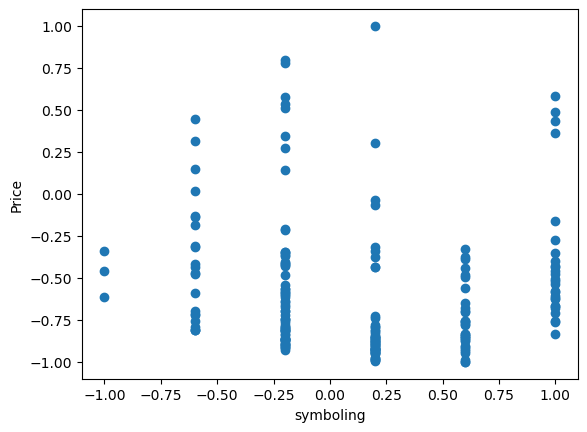

carlength


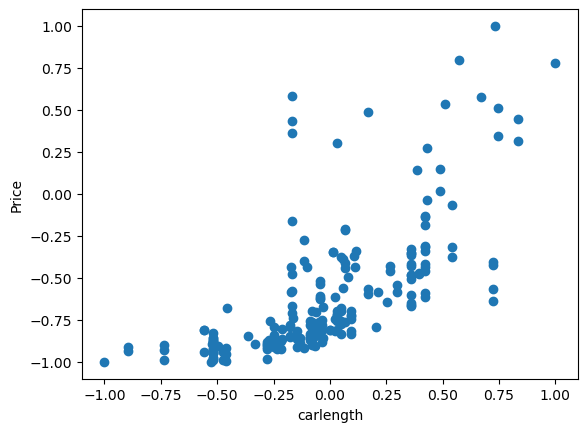

carwidth


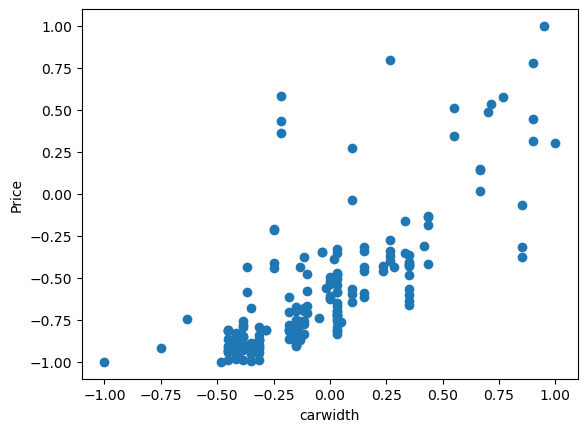

carheight


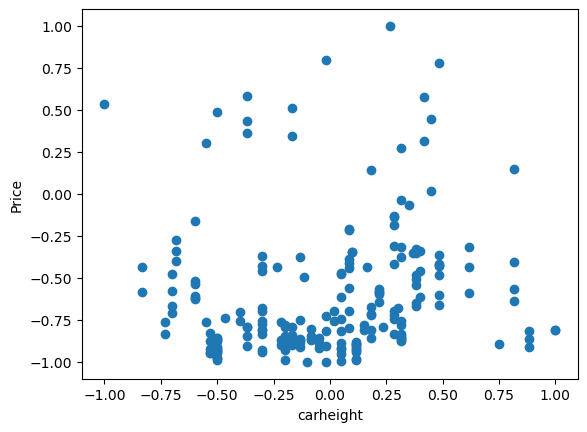

curbweight


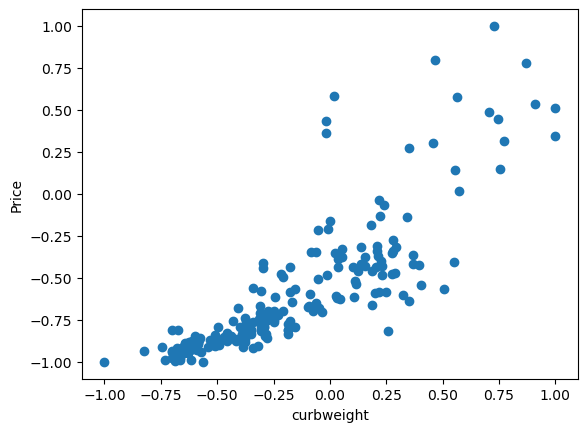

enginesize


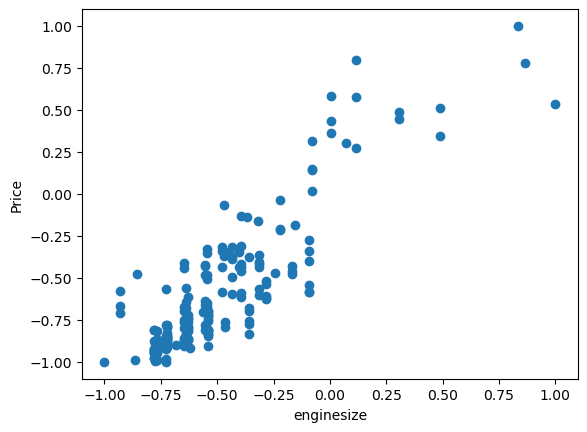

boreratio


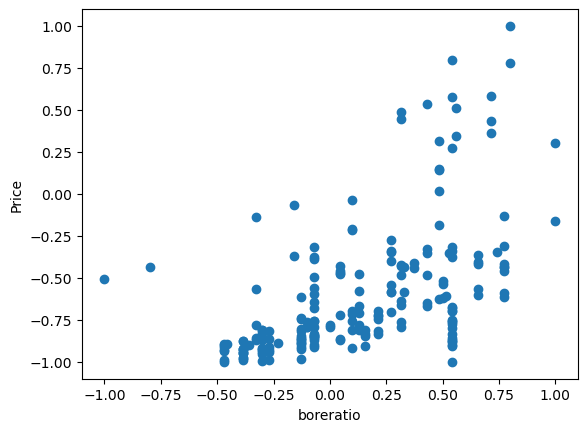

stroke


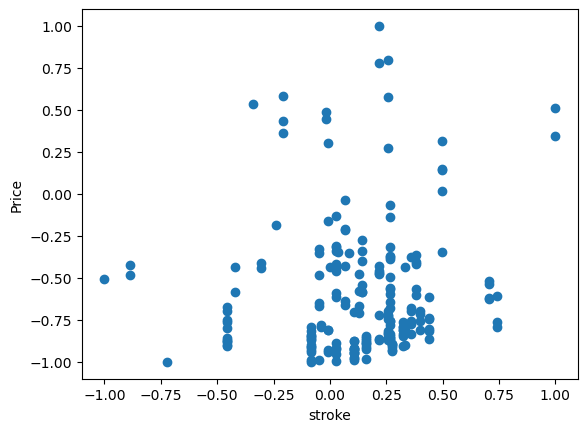

compressionratio


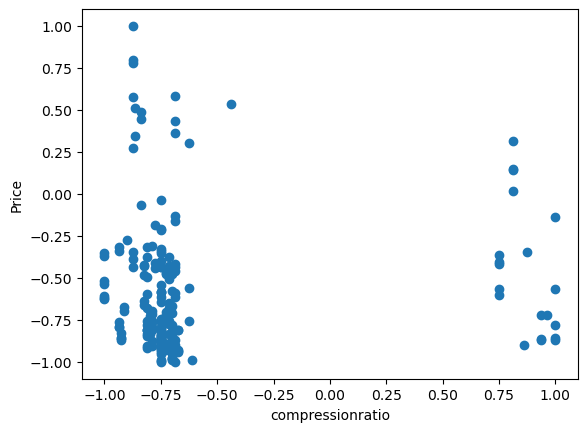

horsepower


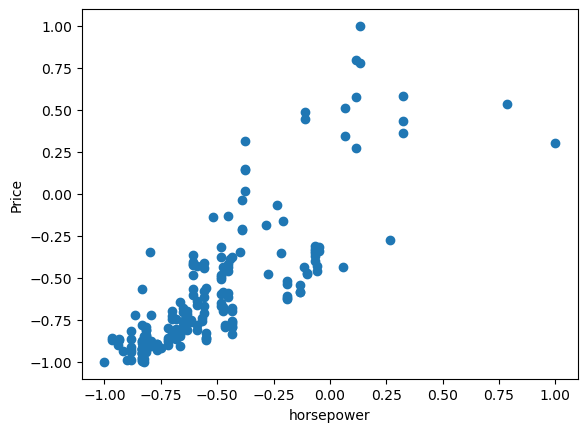

peakrpm


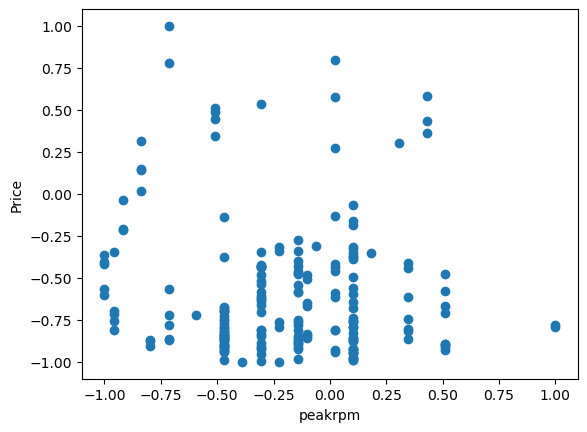

citympg


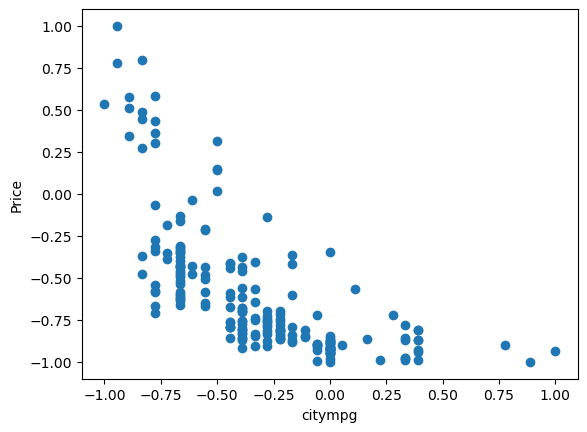

highwaympg


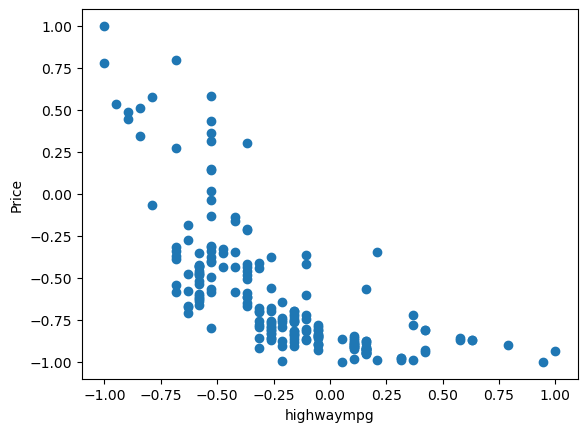

price
fueltype_le


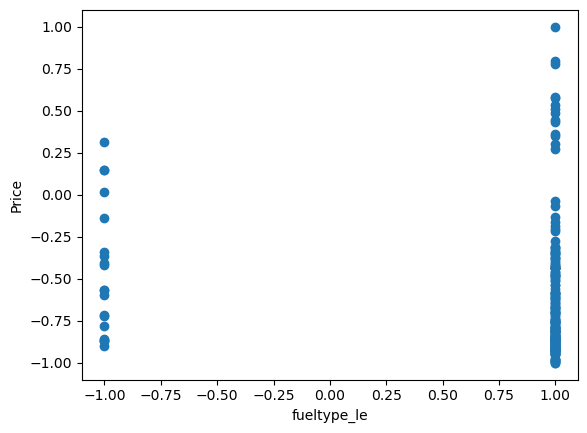

aspiration_le


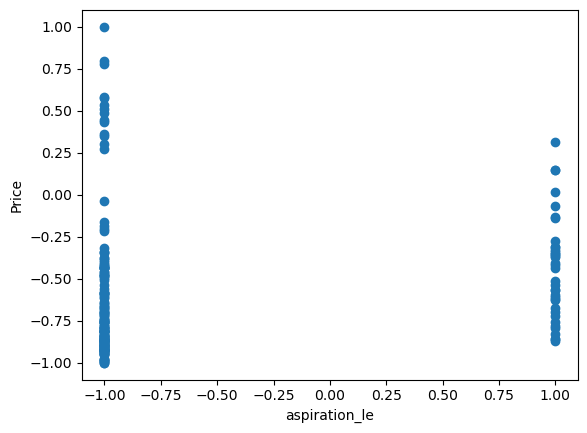

doornumber_le


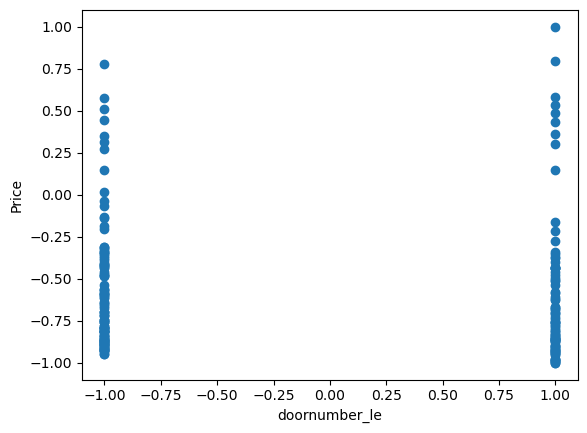

carbody_le


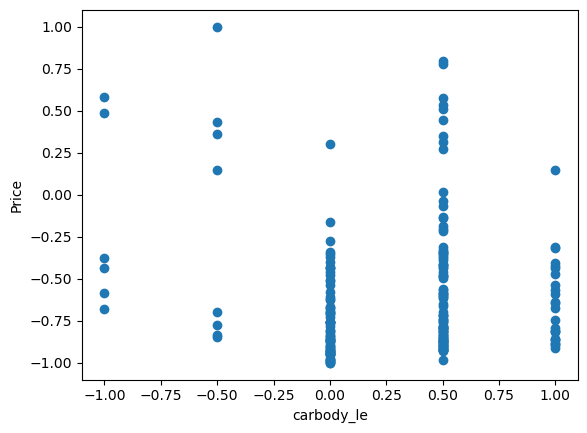

enginetype_le


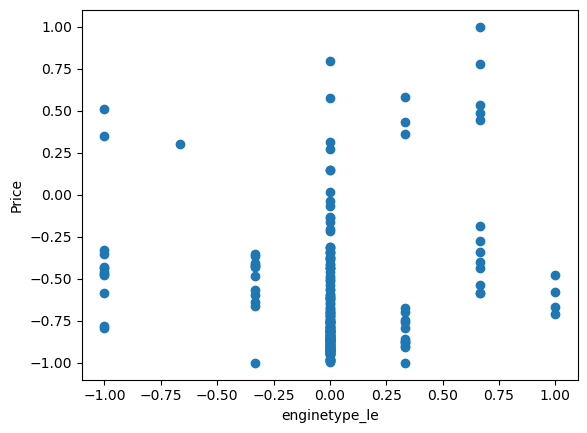

drivewheel_le


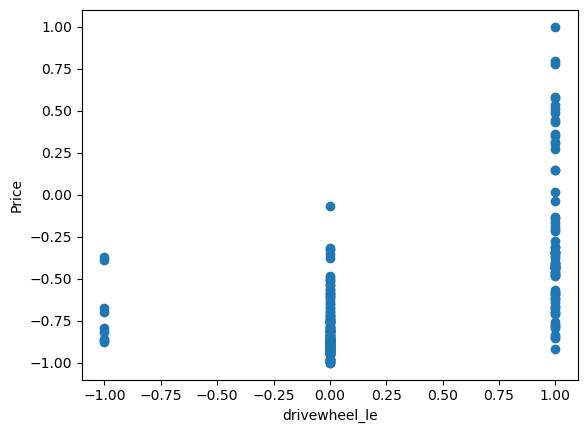

cylindernumber_le


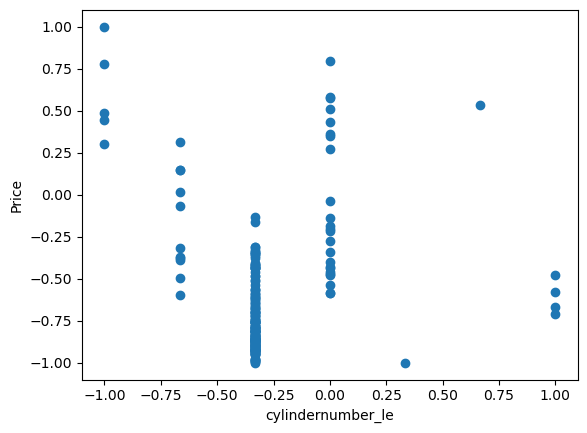

wheelbase_le


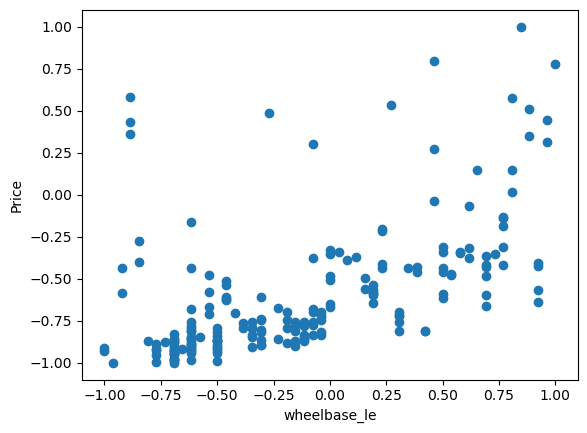

fuelsystem_le


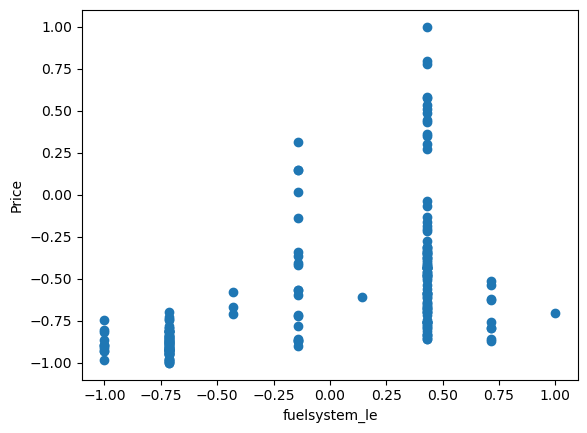

In [13]:
import matplotlib.pyplot as plt
for i in df1.columns:
    print(i)
    if i !='price':
        plt.scatter(df1[i],df1['price'])
        plt.xlabel(i)
        plt.ylabel('Price')
    plt.show()

In [14]:
from sklearn.model_selection import train_test_split as tts
x_train,x_test,y_train,y_test=tts(x,y,random_state=42,test_size=0.4)

In [15]:
from sklearn.linear_model import LinearRegression as LR
model=LR()
model.fit(x_train,y_train)

LinearRegression()

In [16]:
from sklearn.metrics import mean_squared_error as mse
y_pred = model.predict(x_test)
score=mse(y_test,y_pred)
print(f"Mean squared error is: {score}")
score1=model.score(x_test,y_test)
print(f"Accuracy is {(score1*100).__round__(2)}%")

Mean squared error is: 0.030246409712060156
Accuracy is 79.14%


In [17]:
test_for_x=df.drop('price',axis=1)
test_for_y=df['price']
test_pred=model.predict(test_for_x)
test_pred[:10]

array([1225.71630583, 1225.71630583, 1267.51222473, 1281.41358397,
       1342.85282289, 1316.42566953, 1344.10555638, 1352.87711685,
       1362.23259509, 1360.58917391])

In [18]:
test_for_y[:10]

0    13495.000
1    16500.000
2    16500.000
3    13950.000
4    17450.000
5    15250.000
6    17710.000
7    18920.000
8    23875.000
9    17859.167
Name: price, dtype: float64